In [1]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd
from datetime import datetime

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../Resources/CrudeOilPrices_2000-2020_Updated2.csv")
#data = df.rename({"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)": "Price"}, axis=1)
data['Date'] = pd.to_datetime(data['Date'])
#data["Date"].dtype
data

,Date,Price
0,2000-04-01,23.95
1,2000-05-01,23.72
2,2000-06-01,23.55
3,2000-07-01,23.35
4,2000-10-01,22.77
...,...,...
5333,2020-12-24,50.88
5334,2020-12-28,50.88
5335,2020-12-29,50.44
5336,2020-12-30,50.74


In [3]:
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [4]:
#data['MA3'] = data['Price'].shift(1).rolling(window=3).mean()
#data['MA9']= data['Price'].shift(1).rolling(window=9).mean()
#data = data.set_index('Date')
#data

In [5]:
# Dropping the NaN values
data = data.dropna()

# Initialising X and assigning the feature variable
X = data['Price'].values.reshape(-1, 1)

# Getting the head of the data
X

numexpr.utils INFO  NumExpr defaulting to 8 threads.


array([[23.95],
       [23.72],
       [23.55],
       ...,
       [50.44],
       [50.74],
       [51.22]])

In [6]:
# Setting-up the dependent variable
y = data['Date'].values.reshape(-1, 1)

# Getting the head of the data
y

array([['2000-04-01T00:00:00.000000000'],
       ['2000-05-01T00:00:00.000000000'],
       ['2000-06-01T00:00:00.000000000'],
       ...,
       ['2020-12-29T00:00:00.000000000'],
       ['2020-12-30T00:00:00.000000000'],
       ['2020-12-31T00:00:00.000000000']], dtype='datetime64[ns]')

In [7]:
data['Price'].dtype

dtype('float64')

In [8]:
# Setting the training set to 80% of the data
training = 0.8
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]
print(X_train)

[[23.95]
 [23.72]
 [23.55]
 ...
 [50.28]
 [49.8 ]
 [49.08]]


In [9]:
# Generate the coefficient and constant for the regression
model = LinearRegression().fit(X_train,y_train)
predicted_price = model.predict(X_test)

In [10]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))

In [44]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['Price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices (Dollars per Barrel")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [11]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

MSE = mean_squared_error(y_test, predicted_price)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 2.421270853846471, R2: 0.9863527177790016


In [12]:
#Trialling different codes from below

In [54]:
X = data['MA3'].values.reshape(-1, 1)
y = data['Price'].values.reshape(-1, 1)
print(X.shape, y.shape)

(243, 1) (243, 1)


In [51]:
# Training dataset
X_train
y_train

# Testing dataset
X_test
y_test

203    51.08
204    52.36
205    53.90
206    53.82
207    50.25
208    48.83
209    48.32
210    45.11
211    49.19
212    47.32
213    50.59
214    54.32
215    58.35
216    60.37
217    65.92
218    60.98
219    63.41
220    67.28
221    65.81
222    73.89
223    68.80
224    69.82
225    75.37
226    63.67
227    52.98
228    46.31
229    55.29
230    55.76
231    61.59
232    63.55
233    53.25
234    58.91
235    53.64
236    53.91
237    53.60
238    56.04
239    56.15
240    61.17
241    50.06
242    52.52
243    14.97
244    18.49
245    36.74
246    42.18
247    43.76
248    45.72
249    39.75
250    37.78
251    47.03
Name: Price, dtype: float64

In [55]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 32.05  33.14  27.29  29.88  27.78  26.65  28.37  27.88  26.02  26.83
  26.94  23.12  20.47  20.27  21.13  20.4   22.37  26.82  26.58  25.02
  26.79  26.51  27.76  30.71  27.04  27.27  31.97  32.84  36.1   29.48
  26.05  30.72  30.41  32.23  29.57  29.43  28.81  29.89  33.71  34.02
  36.85  34.47  38.26  42.33  38.56  43.83  43.89  50.16  50.1   45.56
  42.16  43.96  47.1   51.67  57.26  50.94  54.4   59.11  61.51  69.5
  65.36  59.85  58.46  63.11  66.61  62.01  66.07  73.75  70.11  75.2
  74.93  69.24  60.96  58.64  63.43  60.77  57.35  61.97  66.03  64.43
  65.09  71.41  76.49  75.07  80.31  93.53  89.29  99.64  89.03 102.42
 100.92 112.6  127.75 141.06 125.03 109.63  98.23  63.93  49.34  46.17
  41.35  40.07  48.46  52.18  68.59  69.32  71.59  68.11  70.67  78.08
  78.39  81.52  74.41  78.71  84.53  86.19  72.7   72.95  81.25  73.97
  81.57  82.94  86.75  91.59  89.54  99.63 107.55 113.03 100.3   94.81
  94.98  88.93  77.34  92.19 100.2  102.96  97.63 108.76 105.25 106.17
  83.17  83.72  88.99  95.34  92.44  87.05  88.69  93.14  97.46  90.71
  97.1   90.74  93.41  97.94 107.93 108.67 102.09  94.56  93.61  95.14
  96.44 105.34  99.69  99.69 103.07 106.06  97.86  92.92  90.74  78.77
  68.98  52.72  49.25  49.59  50.12  59.1   60.24  56.94  45.25  45.38
  44.75  46.12  40.58  36.81  31.62  34.39  35.36  44.75  49.07  49.02
  40.05  43.17  48.8   46.66].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

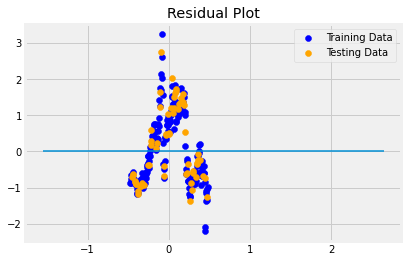

In [84]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [8]:
X = data["Date"]
y = data["Price"]

#X = data["Date"].values.reshape(-1, 1)
#y = data["Price"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (252,) (252,)


([<matplotlib.axis.XTick at 0x7fb3baf69100>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

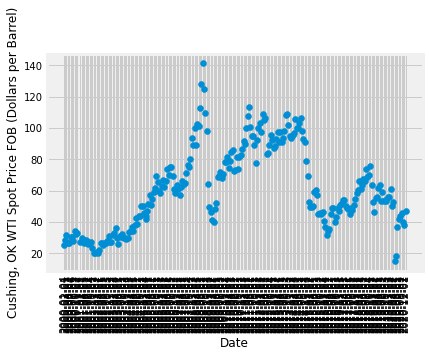

In [13]:
plt.scatter(X, y)
plt.xlabel("Date")
plt.ylabel("Cushing, OK WTI Spot Price FOB (Dollars per Barrel)")
plt.xticks(X, rotation='vertical')

In [79]:
X = data["Date"].values.reshape(-1, 1)
y = data["Price"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (252, 1) (252, 1)


In [80]:
# Split the data into training and testing

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [85]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0586337453869477, R2: 0.11483271749783197


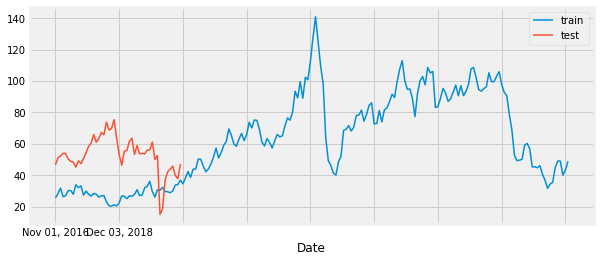

In [31]:
fig, ax=plt.subplots(figsize=(9, 4))
data_train['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].plot(ax=ax, label='train')
data_test['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].plot(ax=ax, label='test')
ax.legend();